In [2]:
import pickle 
import os
import math
import spectools_ir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA

from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import host_subplot
from spectools_ir.slabspec import make_spec
from matplotlib.backends.backend_pdf import PdfPages
from astropy.io import fits
from collections import OrderedDict

In [3]:
convol_fwhm = 30.
au=1.5e11
CO_model=make_spec('CO',1e22,1000,np.pi*(0.3*au)**2., wmin=4.58,wmax=5.45,convol_fwhm=convol_fwhm,d_pc=140.,res=1e-5) # play with convol_fwhm (broader for IQ tau?)
water_model=make_spec('H2O',1e22,1000,np.pi*(0.3*au)**2., wmin=4.58,wmax=5.45,convol_fwhm=convol_fwhm,d_pc=140.,res=1e-5) # play with convol_fwhm (broader for IQ tau?)

Reading partition function from:  https://hitran.org/data/Q/q26.txt
Reading partition function from:  https://hitran.org/data/Q/q1.txt


In [14]:
pathspec = '/Users/belaarwen/Desktop/Vassar/Classes/Astronomy/Thesis/NIRSPECdata'

age = False                                                              # True = all, False = just class II/III
names = np.loadtxt('/Users/belaarwen/Desktop/Vassar/Classes/Astronomy/Thesis/NIRSPECdata/NIRSPECinfo_Clear.csv',usecols=0,delimiter=',',dtype='str')

spec_d = {}                                                              #dictionary of spectra for easy iteration
if age == True:                                                          #grabs entire folder of spectra
    for filename in os.listdir(pathspec):
        f = os.path.join(pathspec,filename)
        if filename == '.DS_Store':                                      #ignore this, lol
            blue = 1                                                     #an extraneous file in my folder
        elif os.path.isfile(f):
            y = filename.replace('_glue.dat','');name = y.replace('nirspec_','')
            wavelength, flux = np.loadtxt(f,skiprows=27,unpack=True)     #read data from file
            data = [wavelength,flux]                                     #merge data
            spec_d[name] = data                                          #write to dictionary
else:
    for filename in os.listdir(pathspec):                                #grabs only Class Is
        f = os.path.join(pathspec,filename)
        if filename == '.DS_Store':
            blue = 1
        elif os.path.isfile(f):
            y = filename.replace('_glue.dat','');name = y.replace('nirspec_','')
            if any(x==name for x in names) == True:                      #checks if filename is in list of names
                wavelength, flux = np.loadtxt(f,skiprows=27,unpack=True) #read data from file
                data = [wavelength,flux]                                 #merge data
                spec_d[name] = data  #write to dictionary
        
spec_d = OrderedDict(sorted(spec_d.items()))                             #puts dictionary in alphabetical order

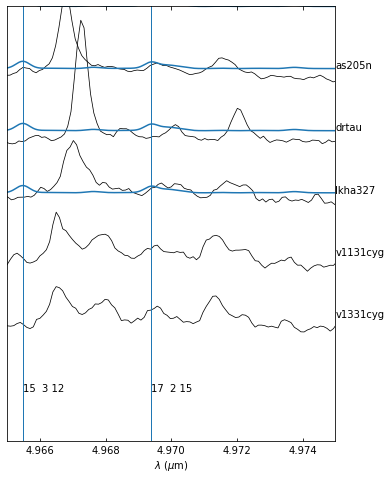

In [16]:
lower_limit_1 = 4.78
upper_limit_1 = 4.795

lower_limit_2 = 4.965
upper_limit_2 = 4.975

lower_limit_3 = 5.1
upper_limit_3 = 5.13

N = int(len(spec_d)/6)                                 #divide number of spectra by 6
N0 = len(spec_d)%6                                     #find number of remaining spectra
n = 0                                                  #to count through dictionary through mutliple loops

for i in range(N):                                     #create N figures
    fig = plt.figure(i+1,figsize=(20,8))               #create the ith figure
    gs = GridSpec(1,3)
    #ax1 = host_subplot(gs[0, 0],axes_class=AA.Axes)
    ax2 = host_subplot(gs[0, 1],axes_class=AA.Axes)
    #ax3 = host_subplot(gs[0, 2],axes_class=AA.Axes)
    for j in range(6):                                  #plotting loop for the 6 spectra
        offset = (6 - j)*0.5                            #setting position on graph
        spot = list(spec_d.items())[n]                  #calls the nth key of the dictionary
        name = spot[0]                                  #grabs the name from the dictionary "entry"
        wave,flux = spot[1]                             #grabs the wavelength and flux
        fix_flux = flux[np.logical_not(np.isnan(flux))] #remove fluxes
        avg_flux = np.average(fix_flux)                 #finds average flux value
        normflux = np.divide(flux,avg_flux)             #normalizes flux so average flux  = 1
        sflux = normflux+offset                         #offsets normalized flux
        #ax1.plot(wave,sflux,'k',linewidth=.75);
        ax2.plot(wave,sflux,'k',linewidth=.75)#;ax3.plot(wave,sflux,'k',linewidth=.75)
        #ax1.text(upper_limit_1,offset+1,name)           #put obj name in between subplots
        ax2.text(upper_limit_2,offset+1,name)
        n+=1                                            #next dictionary value
        
    #ax1.set_xlim(lower_limit_1,upper_limit_1);ax1.set_ylim(1,4.5);ax1.get_yaxis().set_ticks([])
    #ax1.set_xlabel('$\lambda$ ($\mu$m)');ax1.set_ylabel('Normalized Flux + Constant')
    
    ax2.set_xlim(lower_limit_2, upper_limit_2);ax2.set_ylim(1,4.5);ax2.get_yaxis().set_ticks([])#
    ax2.set_xlabel('$\lambda$ ($\mu$m)')
 
    #ax3.set_xlim(lower_limit_3, upper_limit_3);ax3.set_ylim(1,4.5);ax3.get_yaxis().set_ticks([])
    #ax3.set_xlabel('$\lambda$ ($\mu$m)')
      
    
#plotting MODELS:
    for j in range(8):
        offset = (6 - j)*0.5
#        ax1.plot(CO_model['spectrum']['wave'], CO_model['spectrum']['convolflux']+offset+2, label='Convolved CO Model Spectrum', color='C3')
#        ax2.plot(CO_model['spectrum']['wave'], CO_model['spectrum']['convolflux']+offset+2, label='Convolved CO Model Spectrum', color='C3')
#        ax3.plot(CO_model['spectrum']['wave'], CO_model['spectrum']['convolflux']+offset+2, label='Convolved CO Model Spectrum', color='C3')
#        ax1.plot(water_model['spectrum']['wave'], water_model['spectrum']['convolflux']+offset+2, label='Convolved H20 Model Spectrum', color='C0')
        ax2.plot(water_model['spectrum']['wave'], water_model['spectrum']['convolflux']+offset+2, label='Convolved H20 Model Spectrum', color='C0')    
#        ax3.plot(water_model['spectrum']['wave'], water_model['spectrum']['convolflux']+offset+2, label='Convolved H20 Model Spectrum', color='C0')

#adding quantum numbers:  
    for i,lam in enumerate(water_model['lineparams']['wave']):
        #if((lam>lower_limit_1) & (lam<upper_limit_1) & (water_model['lineparams']['eup_k'][i]>4000) & (water_model['lineparams']['tau_peak'][i]>0.15)):
        #    ax1.axvline(lam, linewidth=1, color='tab:blue')
        #    ax1.text(water_model['lineparams']['wave'][i],1.4,water_model['lineparams']['Qpp_HITRAN'][i].strip())
        if((lam>lower_limit_2) & (lam<upper_limit_2) & (water_model['lineparams']['eup_k'][i]>4000) & (water_model['lineparams']['tau_peak'][i]>0.15)):
            ax2.axvline(lam, linewidth=1, color='tab:blue')
            ax2.text(water_model['lineparams']['wave'][i],1.4,water_model['lineparams']['Qpp_HITRAN'][i].strip())
        #if((lam>lower_limit_3) & (lam<upper_limit_3) & (water_model['lineparams']['eup_k'][i]>4000) & (water_model['lineparams']['tau_peak'][i]>0.15)):
        #    ax3.axvline(lam, linewidth=1, color='tab:blue')
        #    ax3.text(water_model['lineparams']['wave'][i],1.4,water_model['lineparams']['Qpp_HITRAN'][i].strip())
            
if N0 > 0:                                               #create a final figure with any remaining spectra
    fig = plt.figure(i+2,figsize=(20,8))                #create final figure
    gs = GridSpec(1,3)
    #ax1 = host_subplot(gs[0, 0],axes_class=AA.Axes)
    ax2 = host_subplot(gs[0, 1],axes_class=AA.Axes)
    #ax3 = host_subplot(gs[0, 2],axes_class=AA.Axes)
    for j in range(N0):                                 #add final spectra to fig
        offset = (6 - j)*0.5                            #setting position on graph
        spot = list(spec_d.items())[n]                  #calls the nth key of the dictionary
        name = spot[0]                                  #grabs the name from the dictionary "entry"
        wave,flux = spot[1]                             #grabs the wavelength and flux
        fix_flux = flux[np.logical_not(np.isnan(flux))] #remove nan fluxes
        avg_flux = np.average(fix_flux)                 #finds average flux value
        normflux = np.divide(flux,avg_flux)             #normalizes flux so average flux  = 1
        sflux = normflux+offset                         #offsets normalized flux
        #ax1.plot(wave,sflux,'k',linewidth=.75);
        ax2.plot(wave,sflux,'k',linewidth=.75);#ax3.plot(wave,sflux,'k',linewidth=.75)
        #ax1.text(upper_limit_1,offset+1,name)           #put obj name in between subplots
        ax2.text(upper_limit_2,offset+1,name)
        n+=1                                            #next dictionary value
                            
    #ax1.set_xlim(lower_limit_1, upper_limit_1);ax1.set_ylim(1,4.5);ax1.get_yaxis().set_ticks([])
    #ax1.set_xlabel('$\lambda$ ($\mu$m)');ax1.set_ylabel('Normalized Flux + Constant')
    
    ax2.set_xlim(lower_limit_2, upper_limit_2);ax2.set_ylim(1,4.5);ax2.get_yaxis().set_ticks([])
    ax2.set_xlabel('$\lambda$ ($\mu$m)')
    
    #ax3.set_xlim(lower_limit_3, upper_limit_3);ax3.set_ylim(1,4.5);ax1.get_yaxis().set_ticks([])
    #ax3.set_xlabel('$\lambda$ ($\mu$m)')
    
#plotting MODELS:
    for j in range(N0):                                 
        offset = (6 - j)*0.5                            
#        ax1.plot(CO_model['spectrum']['wave'], CO_model['spectrum']['convolflux']+offset+2, label='Convolved CO Model Spectrum', color='C3')
#        ax2.plot(CO_model['spectrum']['wave'], CO_model['spectrum']['convolflux']+offset+2, label='Convolved CO Model Spectrum', color='C3')
#        ax3.plot(CO_model['spectrum']['wave'], CO_model['spectrum']['convolflux']+offset+2, label='Convolved CO Model Spectrum', color='C3')
        #ax1.plot(water_model['spectrum']['wave'], water_model['spectrum']['convolflux']+offset+2, label='Convolved H20 Model Spectrum', color='C0')
        ax2.plot(water_model['spectrum']['wave'], water_model['spectrum']['convolflux']+offset+2, label='Convolved H20 Model Spectrum', color='C0')    
        #ax3.plot(water_model['spectrum']['wave'], water_model['spectrum']['convolflux']+offset+2, label='Convolved H20 Model Spectrum', color='C0')

#adding quantum lines:
    for i,lam in enumerate(water_model['lineparams']['wave']):
        #if((lam>lower_limit_1) & (lam<upper_limit_1) & (water_model['lineparams']['eup_k'][i]>4000) & (water_model['lineparams']['tau_peak'][i]>0.15)):
        #    ax1.axvline(lam, linewidth=1, color='tab:blue')
        #    ax1.text(water_model['lineparams']['wave'][i],1.4,water_model['lineparams']['Qpp_HITRAN'][i].strip())
        if((lam>lower_limit_2) & (lam<upper_limit_2) & (water_model['lineparams']['eup_k'][i]>4000) & (water_model['lineparams']['tau_peak'][i]>0.15)):
            ax2.axvline(lam, linewidth=1, color='tab:blue')
            ax2.text(water_model['lineparams']['wave'][i],1.4,water_model['lineparams']['Qpp_HITRAN'][i].strip())
        #if((lam>lower_limit_3) & (lam<upper_limit_3) & (water_model['lineparams']['eup_k'][i]>4000) & (water_model['lineparams']['tau_peak'][i]>0.15)):
        #    ax3.axvline(lam, linewidth=1, color='tab:blue')
        #    ax3.text(water_model['lineparams']['wave'][i],1.4,water_model['lineparams']['Qpp_HITRAN'][i].strip())
